In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [31]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


######**Null Count**

In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

######**Getting the shape**

In [33]:
df.shape

(400, 5)

**Check Data types**

In [34]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

#####**Descriptive Analysis**

In [35]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


######**Encoding**

In [36]:
df['Gender'].replace('Male',0,inplace=True)
df['Gender'].replace('Female',1,inplace=True)

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [38]:
from sklearn.model_selection import train_test_split # split the data
from sklearn import metrics # evaluation metrics

In [39]:
#split the data
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [41]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(4) #initialising the model
knn.fit(x_train,y_train) # training the model

KNeighborsClassifier(n_neighbors=4)

**Predicting the Test set results**

In [42]:
print("K value  : " , 4, " train score : ", knn.score(x_train,y_train) , " score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
y_pred= knn.predict(x_test)  

K value  :  4  train score :  0.925  score :  0.8892857142857142


**Making the Confusion Matrix**

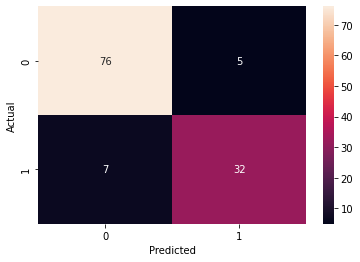

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True) 